In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re

In [2]:
def get_related_corrs(df):#returns names of related corrs with corr function
    corrs = df.corr()
    relatedcols = []
    for index in corrs.index:
        for col in corrs.columns:
            if(corrs.at[index,col]<1 and corrs.at[index,col]> 0.17):
                if not(col in relatedcols):
                    relatedcols.append(col)
    return df[relatedcols]

In [3]:
igdb_old_EDA=pd.read_pickle('igdb_new_cleaned.pkl')
igdb_old_EDA

,name,artworks,follows,quarter,genres,videos,platform,year,total_rating,is_famous_company,is_multigenre,is_multiplatform,genre,has_multiplayer
0,fallout: new vegas,3,1.000000,4,"[5, 12]",2,6,2010,84,0,1,1,5,0
1,bioshock 2,11,1.000000,1,"[5, 12, 31]",0,6,2010,83,0,1,1,5,1
2,mafia ii,1,1.000000,3,"[5, 10, 31]",1,6,2010,76,0,1,1,5,0
3,tales of monkey island,0,0.198276,4,"[2, 9, 31]",1,6,2010,78,0,1,1,2,0
4,the secret of monkey island: special edition,2,0.370690,2,"[2, 9, 31]",1,6,2010,82,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,stardew valley,1,1.000000,1,"[12, 13, 32]",2,6,2019,88,0,1,1,12,1
2496,ashen,3,0.551724,4,"[12, 31, 32]",6,6,2019,82,0,1,1,12,1
2497,move or die,1,0.086207,1,"[8, 32, 33]",0,6,2019,79,0,1,1,8,1
2498,darkwood,4,0.068966,3,"[12, 31, 32]",3,6,2019,75,0,1,1,12,0


In [4]:
pattern='\((.*)\)'
Action=0
Strategy=0
Sports=0
Simulation=0
Arcade=0
Racing=0
Shooter=0
Puzzle=0
Casino=0
RPG=0
Platform=0
Gambling=0
Fighting=0

for i in igdb_old_EDA['genres']:
    if 31 in i:
        Action+=1
    elif 15 in i:
        Strategy+=1
    elif 14 in i:
        Sports+=1
    elif 13 in i:
        Simulation+=1    
    elif 33 in i:
        Arcade+=1    
    elif 10 in i:
        Racing+=1
    elif 5 in i:
        Shooter+=1
    elif 9 in i:
        Puzzle+=1
    elif 35 in i:
        Casino+=1
    elif 12 in i:
        RPG+=1    
    elif 8 in i:
        Platform+=1
    elif 24 in i:
        Gambling+=1
    elif 4 in i:
        Fighting+=1    

        


In [5]:
Strategy

201

In [6]:
genre_counter=[Action,Strategy,Sports,Simulation, Arcade, Racing, Shooter, Puzzle, RPG, Platform, Fighting]
genre_name=['Action','Strategy','Sport','Simulation', 'Arcade', 'Racing', 'Shooter', 'Puzzle', 'RPG', 'Platform','Fighting']
genre_dF=pd.DataFrame({'Genre counter':genre_counter},index=genre_name)
genre_dF


,Genre counter
Action,893
Strategy,201
Sport,60
Simulation,48
Arcade,64
Racing,31
Shooter,169
Puzzle,15
RPG,80
Platform,25


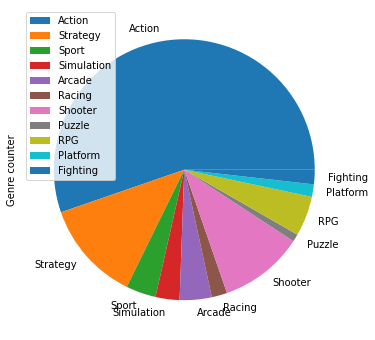

In [7]:
plot = genre_dF.plot.pie(y='Genre counter', figsize=(6, 6))
plt.savefig('number_of_injuries.png', transparent = True)
plt.show()

In [8]:
counter=0
year_new=[]
for i in igdb_old_EDA['year']:
    year_new.append(i)
    counter=counter+1   



In [9]:
# igdb_old_EDA.plot(x ='Z', y='S', kind = 'bar')
year=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]


value=0
year_2010=0
year_2011=0
year_2012=0
year_2013=0
year_2014=0
year_2015=0
year_2016=0
year_2017=0
year_2018=0
year_2019=0
for i in range(0, counter):
        value=year_new[i]
        if value==2010:
            year_2010+=1
        elif value==2011:
            year_2011+=1
        elif value==2012:
            year_2012+=1
        elif value==2013:
            year_2013+=1   
        elif value==2014:
            year_2014+=1 
        elif value==2015:
            year_2015+=1
        elif value==2016:
            year_2016+=1
        elif value==2017:
            year_2017+=1
        elif value==2018:
            year_2018+=1
        elif value==2019:
            year_2019+=1  
         

In [10]:
year_2019

154

In [11]:
year_data = [[year[0], year_2010],[year[1], year_2011],[year[2], year_2012],[year[3], year_2013],[year[4], year_2014],[year[5], year_2015],[year[6], year_2016],[year[7], year_2017],[year[8], year_2018],[year[9], year_2019]]
year_df = pd.DataFrame(year_data, columns = ['Year', 'Number of games'])
year_df


,Year,Number of games
0,2010,236
1,2011,191
2,2012,171
3,2013,141
4,2014,127
5,2015,150
6,2016,142
7,2017,171
8,2018,142
9,2019,154


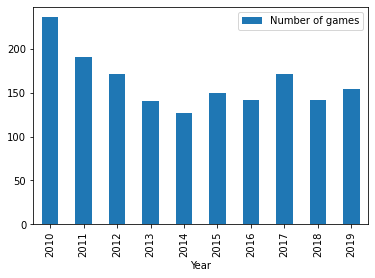

In [12]:
year_df.plot(x ='Year', y='Number of games', kind = 'bar')
plt.show()

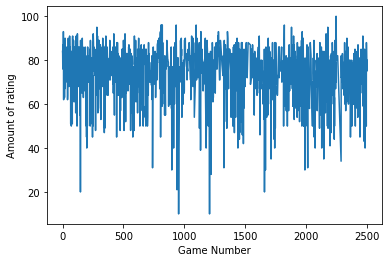

In [13]:
igdb_old_EDA['total_rating'].plot()
plt.xlabel('Game Number')
plt.ylabel('Amount of rating')
plt.show()

Text(0, 0.5, 'has multiplayer')

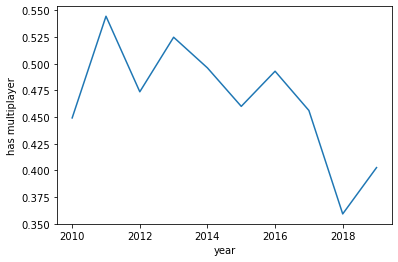

In [14]:
igdb_old_EDA.groupby('year').has_multiplayer.mean().plot()
plt.ylabel('has multiplayer')

Text(0, 0.5, 'rating')

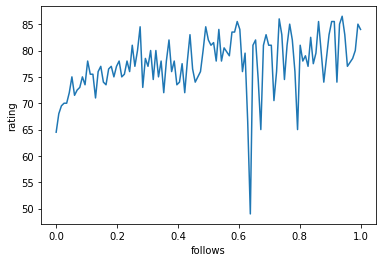

In [15]:
igdb_old_EDA.groupby('follows').total_rating.median().plot()
plt.ylabel('rating')

Text(0, 0.5, 'rating')

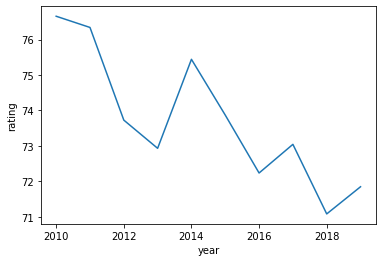

In [16]:
igdb_old_EDA.groupby('year').total_rating.mean().plot()
plt.ylabel('rating')

Text(0, 0.5, '% of games by famous companies')

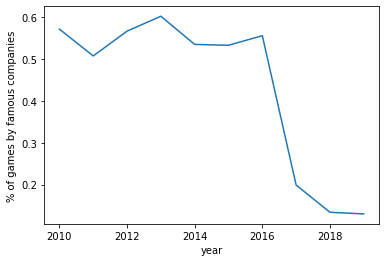

In [17]:
igdb_old_EDA.groupby('year').is_famous_company.mean().plot()
plt.ylabel('% of games by famous companies')

Text(0, 0.5, 'number of followers(normalized)')

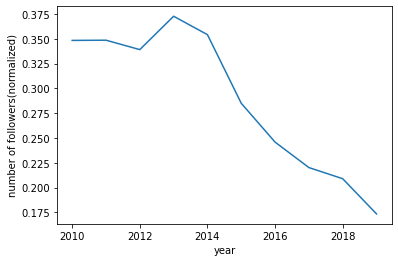

In [18]:
igdb_old_EDA.groupby('year').follows.mean().plot()
plt.ylabel('number of followers(normalized)')

Text(0, 0.5, 'total rating')

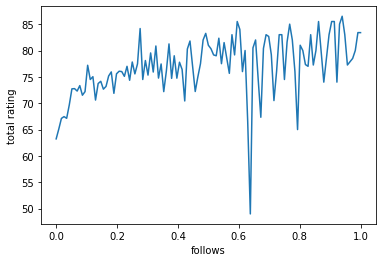

In [19]:
igdb_old_EDA.groupby('follows').total_rating.mean().plot()
plt.ylabel('total rating')

                    follows    videos  total_rating  artworks      year  \
follows            1.000000  0.358110      0.447208  0.409264 -0.182561   
videos             0.358110  1.000000      0.085118  0.245282  0.191171   
total_rating       0.447208  0.085118      1.000000  0.170086 -0.142874   
artworks           0.409264  0.245282      0.170086  1.000000 -0.112927   
year              -0.182561  0.191171     -0.142874 -0.112927  1.000000   
is_famous_company  0.157337 -0.108051      0.217384  0.069255 -0.297015   

                   is_famous_company  
follows                     0.157337  
videos                     -0.108051  
total_rating                0.217384  
artworks                    0.069255  
year                       -0.297015  
is_famous_company           1.000000  


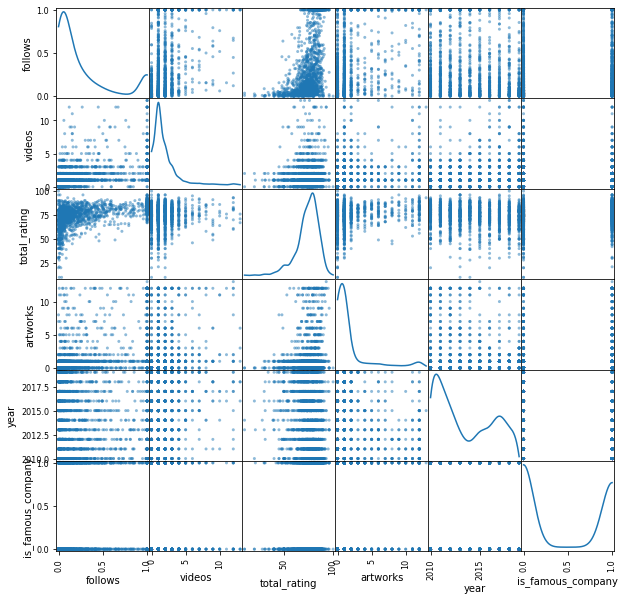

In [21]:
igdb_new =  get_related_corrs(igdb_old_EDA)
print(igdb_new.corr())
pd.plotting.scatter_matrix(igdb_new, figsize=(10, 10), diagonal='kde')
plt.show()